### Imports

In [1]:
########## Imports ##########

import numpy as np
import pandas as pd
import packages.fonctions as fonctions

# Représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import re

from datetime import datetime
from time import time

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Outliers
from sklearn.ensemble import IsolationForest

In [2]:
########## Apparence ##########

# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)

# Choix d'une palette de couleurs
sns.set_palette('Set2', color_codes = True)
print(sns.color_palette('Set2').as_hex())
sns.set_style('darkgrid')
sns.color_palette()

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

## Analyse exploratoire des données (EDA)

### application_train.csv

In [3]:
########## df train -> avec target ##########
df_train = pd.read_csv('data/application_train.csv')
df_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
# Caractéristiques générales du jeu de données

In [5]:
df_train.shape

(307511, 122)

In [6]:
# The training data has 307511 observations (each one a separate loan) and 122 features (variables) including 
# the TARGET (the label we want to predict).

In [7]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
########## FEATURE ENGINEERING ##########

df_train['PROPORTION_LIFE_EMPLOYED'] = df_train['DAYS_EMPLOYED'] / df_train['DAYS_BIRTH']
df_train['INCOME_TO_CREDIT_RATIO'] = df_train['AMT_INCOME_TOTAL'] / df_train['AMT_CREDIT']
df_train['INCOME_TO_ANNUITY_RATIO'] = df_train['AMT_INCOME_TOTAL'] / df_train['AMT_ANNUITY']
df_train['INCOME_TO_ANNUITY_RATIO_BY_AGE'] = df_train['INCOME_TO_ANNUITY_RATIO'] * df_train['DAYS_BIRTH']
df_train['CREDIT_TO_ANNUITY_RATIO'] = df_train['AMT_CREDIT'] / df_train['AMT_ANNUITY']
df_train['CREDIT_TO_ANNUITY_RATIO_BY_AGE'] = df_train['CREDIT_TO_ANNUITY_RATIO'] * df_train['DAYS_BIRTH']
df_train['INCOME_TO_FAMILYSIZE_RATIO'] = df_train['AMT_INCOME_TOTAL'] / df_train['CNT_FAM_MEMBERS']
df_train['ANNUITY_INCOME_PERC'] = df_train['AMT_ANNUITY'] / df_train['AMT_INCOME_TOTAL']

In [10]:
# Copie du jeu de données
df_features = df_train.copy()

In [11]:
########## EXTRACTION DES IDs ##########

train_ids = df_features["SK_ID_CURR"]
train_ids

0         100002
1         100003
2         100004
3         100006
4         100007
           ...  
307506    456251
307507    456252
307508    456253
307509    456254
307510    456255
Name: SK_ID_CURR, Length: 307511, dtype: int64

In [12]:
########## EXTRACTION DES TARGETS ##########
targets = df_features['TARGET']
targets

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [13]:
# drop des IDs et de la target
df_features.drop(['SK_ID_CURR', 'TARGET'], axis = 1, inplace = True)

In [14]:
df_features.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       ...
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'PROPORTION_LIFE_EMPLOYED', 'INCOME_TO_CREDIT_RATIO',
       'INCOME_TO_ANNUITY_RATIO', 'INCOME_TO_ANNUITY_RATIO_BY_AGE',
       'CREDIT_TO_ANNUITY_RATIO', 'CREDIT_TO_ANNUITY_RATIO_BY_AGE',
       'INCOME_TO_FAMILYSIZE_RATIO', 'ANNUITY_INCOME_PERC'],
      dtype='object', length=128)

In [15]:
########## ENCODING ##########

# var catégorielles -> get dummies
# var binaires -> label encoder
# NaN traitées comme une catégorie

label_encoder = LabelEncoder()

categorical_columns_train  = []

for col in df_features :
    if df_features[col].dtype == object:
        #Label encodage pour les variables binaires
        if df_features[col].nunique() == 2:
            df_features[col] = label_encoder.fit_transform(df_features[col])
        #récupération des colonnes où on fera un one hot encodage
        elif df_features[col].nunique() > 2:
            categorical_columns_train.append(col)

df_features = pd.get_dummies(df_features, columns = categorical_columns_train, dummy_na = True)

In [16]:
# Extraction des noms des Feature
feat_name = list(df_features.columns)

#Imputation des Nan
imputer = SimpleImputer(strategy = 'median')

features = imputer.fit_transform(df_features)

# Scale les features
scaler = MinMaxScaler(feature_range = (0, 1))

features = scaler.fit_transform(features)

# Création des dataset
features_set = pd.DataFrame(features, columns = feat_name)

#Ajout de la colonne TARGET et des ids
features_set['TARGET'] = targets
features_set["SK_ID_CURR"] = train_ids

#Passage des id en index
features_set.set_index('SK_ID_CURR', inplace = True)

In [17]:
features_set

NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
SK_ID_CURR                                                                    
100002                     0.0           0.0              1.0           0.0   
100003                     0.0           0.0              0.0           0.0   
100004                     1.0           1.0              1.0           0.0   
100006                     0.0           0.0              1.0           0.0   
100007                     0.0           0.0              1.0           0.0   
...                        ...           ...              ...           ...   
456251                     0.0           0.0              0.0           0.0   
456252                     0.0           0.0              1.0           0.0   
456253                     0.0           0.0              1.0           0.0   
456254                     0.0           0.0              1.0           0.0   
456255                     0.0           0.0              0.0           0.0   

            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                                                               
100002              0.001512    0.090287     0.090032         0.077441   
100003              0.002089    0.311736     0.132924         0.271605   
100004              0.000358    0.022472     0.020025         0.023569   
100006              0.000935    0.066837     0.109477         0.063973   
100007              0.000819    0.116854     0.078975         0.117845   
...                      ...         ...          ...              ...   
456251              0.001127    0.052360     0.101176         0.046016   
456252              0.000396    0.056067     0.040505         0.046016   
456253              0.001089    0.157969     0.110618         0.135802   
456254              0.001243    0.081175     0.072499         0.069585   
456255              0.001127    0.157303     0.185258         0.158249   

            REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
SK_ID_CURR                                                          
100002                        0.256321    0.888839       0.045086   
100003                        0.045016    0.477114       0.043648   
100004                        0.134897    0.348534       0.046161   
100006                        0.107023    0.350846       0.038817   
100007                        0.392880    0.298591       0.038820   
...                                ...         ...            ...   
456251                        0.446855    0.896392       0.046133   
456252                        0.344429    0.251071       1.000000   
456253                        0.065247    0.578523       0.026076   
456254                        0.069553    0.747914       0.034258   
456255                        0.635991    0.471984       0.043455   

            DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
SK_ID_CURR                                                                
100002               0.852140         0.705433     0.098901         1.0   
100003               0.951929         0.959566     0.098901         1.0   
100004               0.827335         0.648326     0.285714         1.0   
100006               0.601451         0.661387     0.098901         1.0   
100007               0.825268         0.519522     0.098901         1.0   
...                       ...              ...          ...         ...   
456251               0.657263         0.724607     0.098901         1.0   
456252               0.822147         0.431708     0.098901         1.0   
456253               0.726937         0.284424     0.098901         1.0   
456254               0.896158         0.870641     0.098901         1.0   
456255               0.792153         0.943032     0.098901         1.0   

            FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
SK_ID_CURR                                                            

In [18]:
# Export données 'propres' au format pickle
import os, pickle

# Chemin d'accès aux données (à modifier si code en local)
#path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
path = '' #-> en local

# specifier le chemin choisi
filepath = os.path.join(path, 'df_train_clean')

# exporter en format pickle
with open(filepath, 'wb') as f:
    pickle.dump(features_set, f)

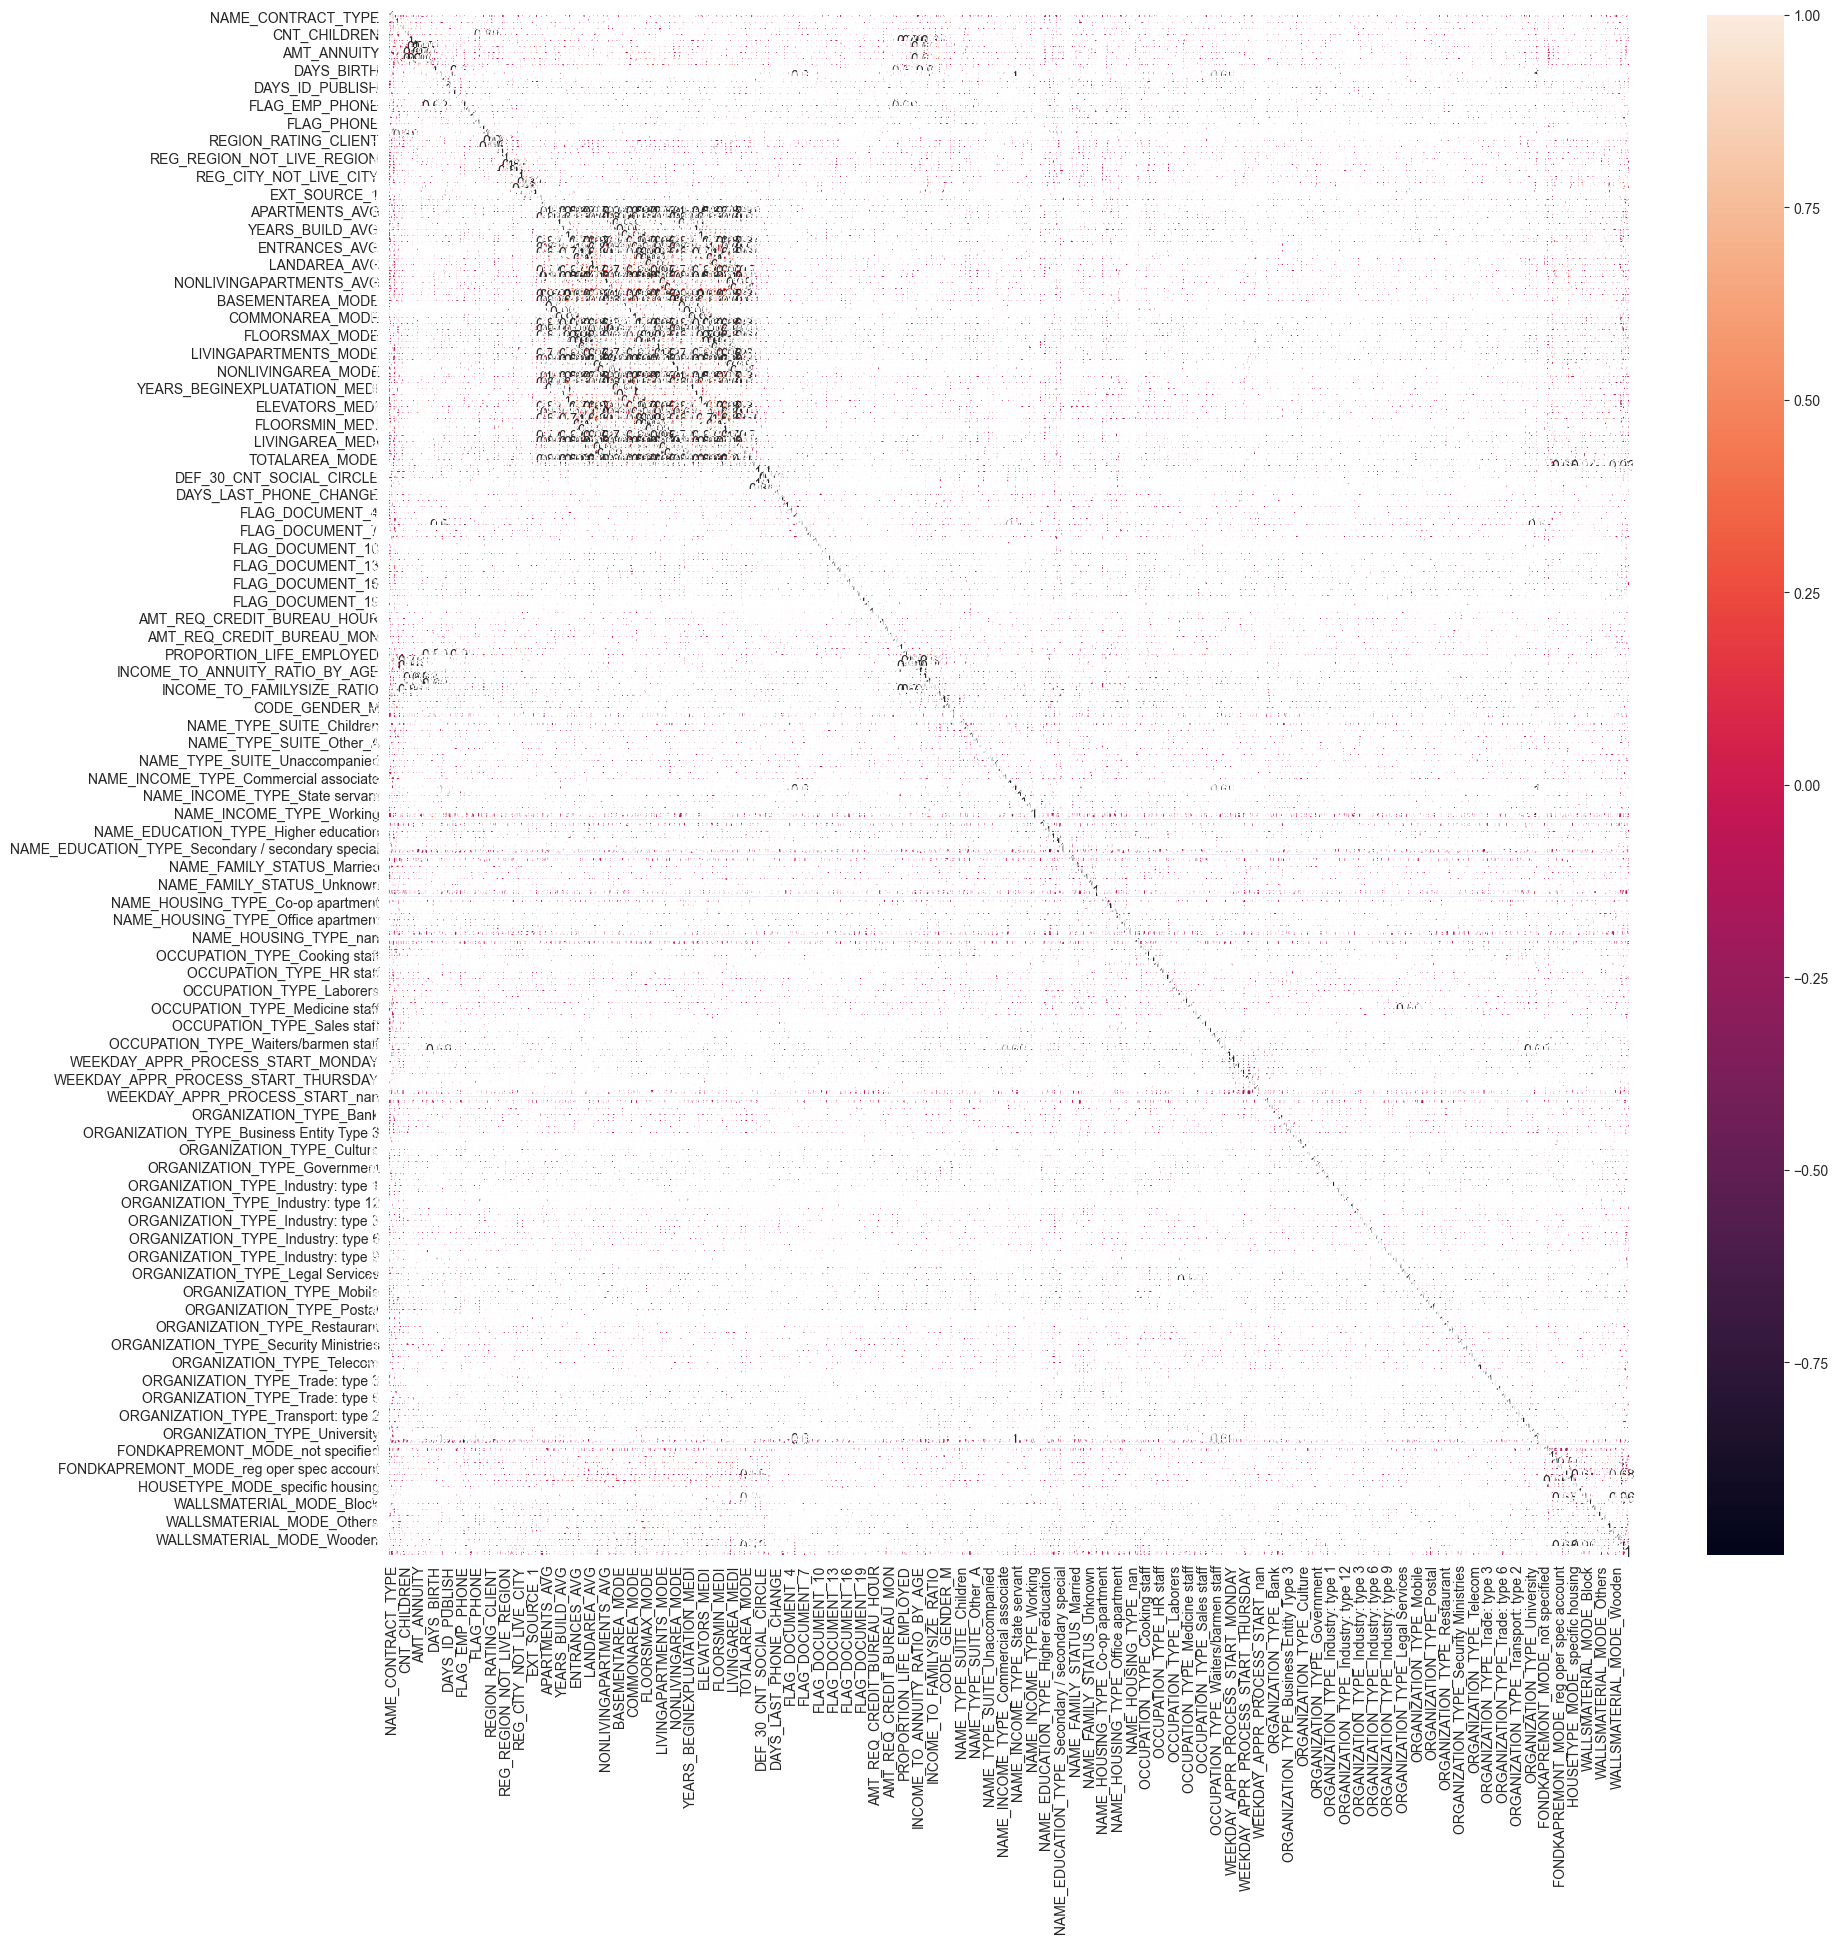

In [19]:
# Matrice de corrélations
plt.figure(figsize = (20, 20))
try:
    sns.heatmap(features_set.corr(numeric_only = True), annot = True)
except:
    sns.heatmap(features_set.corr(), annot = True)
plt.show()

In [20]:
# Corrélations avec la target (numeric only)
correlations = features_set.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 CODE_GENDER_M                     0.054713
DAYS_LAST_PHONE_CHANGE            0.055218
NAME_INCOME_TYPE_Working          0.057481
REGION_RATING_CLIENT              0.058899
REGION_RATING_CLIENT_W_CITY       0.060893
CREDIT_TO_ANNUITY_RATIO_BY_AGE    0.061579
DAYS_BIRTH                        0.078239
TARGET                            1.000000
CODE_GENDER_nan                        NaN
NAME_INCOME_TYPE_nan                   NaN
NAME_EDUCATION_TYPE_nan                NaN
NAME_FAMILY_STATUS_nan                 NaN
NAME_HOUSING_TYPE_nan                  NaN
WEEKDAY_APPR_PROCESS_START_nan         NaN
ORGANIZATION_TYPE_nan                  NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_2                           -0.160295
EXT_SOURCE_3                           -0.155892
EXT_SOURCE_1                           -0.098887
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensi

In [21]:
# Find the correlation of the positive days since birth and target
features_set['DAYS_BIRTH'] = abs(features_set['DAYS_BIRTH'])
print("Corrélation entre l'âge du client au moment du prêt et la TARGET :", features_set['DAYS_BIRTH'].corr(features_set['TARGET']))

Corrélation entre l'âge du client au moment du prêt et la TARGET : 0.07823930830982702


In [22]:
# Plus les clients vieillissent, plus ils ont tendance à rembourser leurs prêts dans les délais

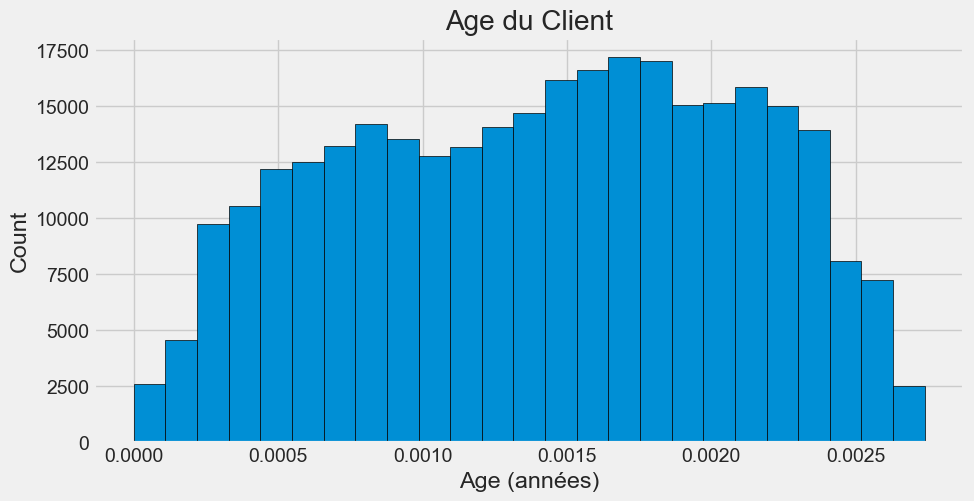

In [23]:
# choix du style du tracé
plt.style.use('fivethirtyeight')

# Tracé de la distribution des ages
plt.figure(figsize=(10,5))
plt.hist(features_set['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age du Client'); plt.xlabel('Age (années)'); plt.ylabel('Count');

In [26]:
ext_data = features_set[['TARGET',
 #'CODE_GENDER',
 'FLAG_OWN_CAR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'REGION_RATING_CLIENT',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3']]

ext_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307511 entries, 100002 to 456255
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TARGET                307511 non-null  int64  
 1   FLAG_OWN_CAR          307511 non-null  float64
 2   CNT_CHILDREN          307511 non-null  float64
 3   AMT_INCOME_TOTAL      307511 non-null  float64
 4   AMT_CREDIT            307511 non-null  float64
 5   AMT_ANNUITY           307511 non-null  float64
 6   AMT_GOODS_PRICE       307511 non-null  float64
 7   DAYS_BIRTH            307511 non-null  float64
 8   DAYS_EMPLOYED         307511 non-null  float64
 9   DAYS_REGISTRATION     307511 non-null  float64
 10  OWN_CAR_AGE           307511 non-null  float64
 11  REGION_RATING_CLIENT  307511 non-null  float64
 12  EXT_SOURCE_1          307511 non-null  float64
 13  EXT_SOURCE_2          307511 non-null  float64
 14  EXT_SOURCE_3          307511 non-null  float64
dtype

Text(0.5, 1.0, 'Correlation Heatmap')

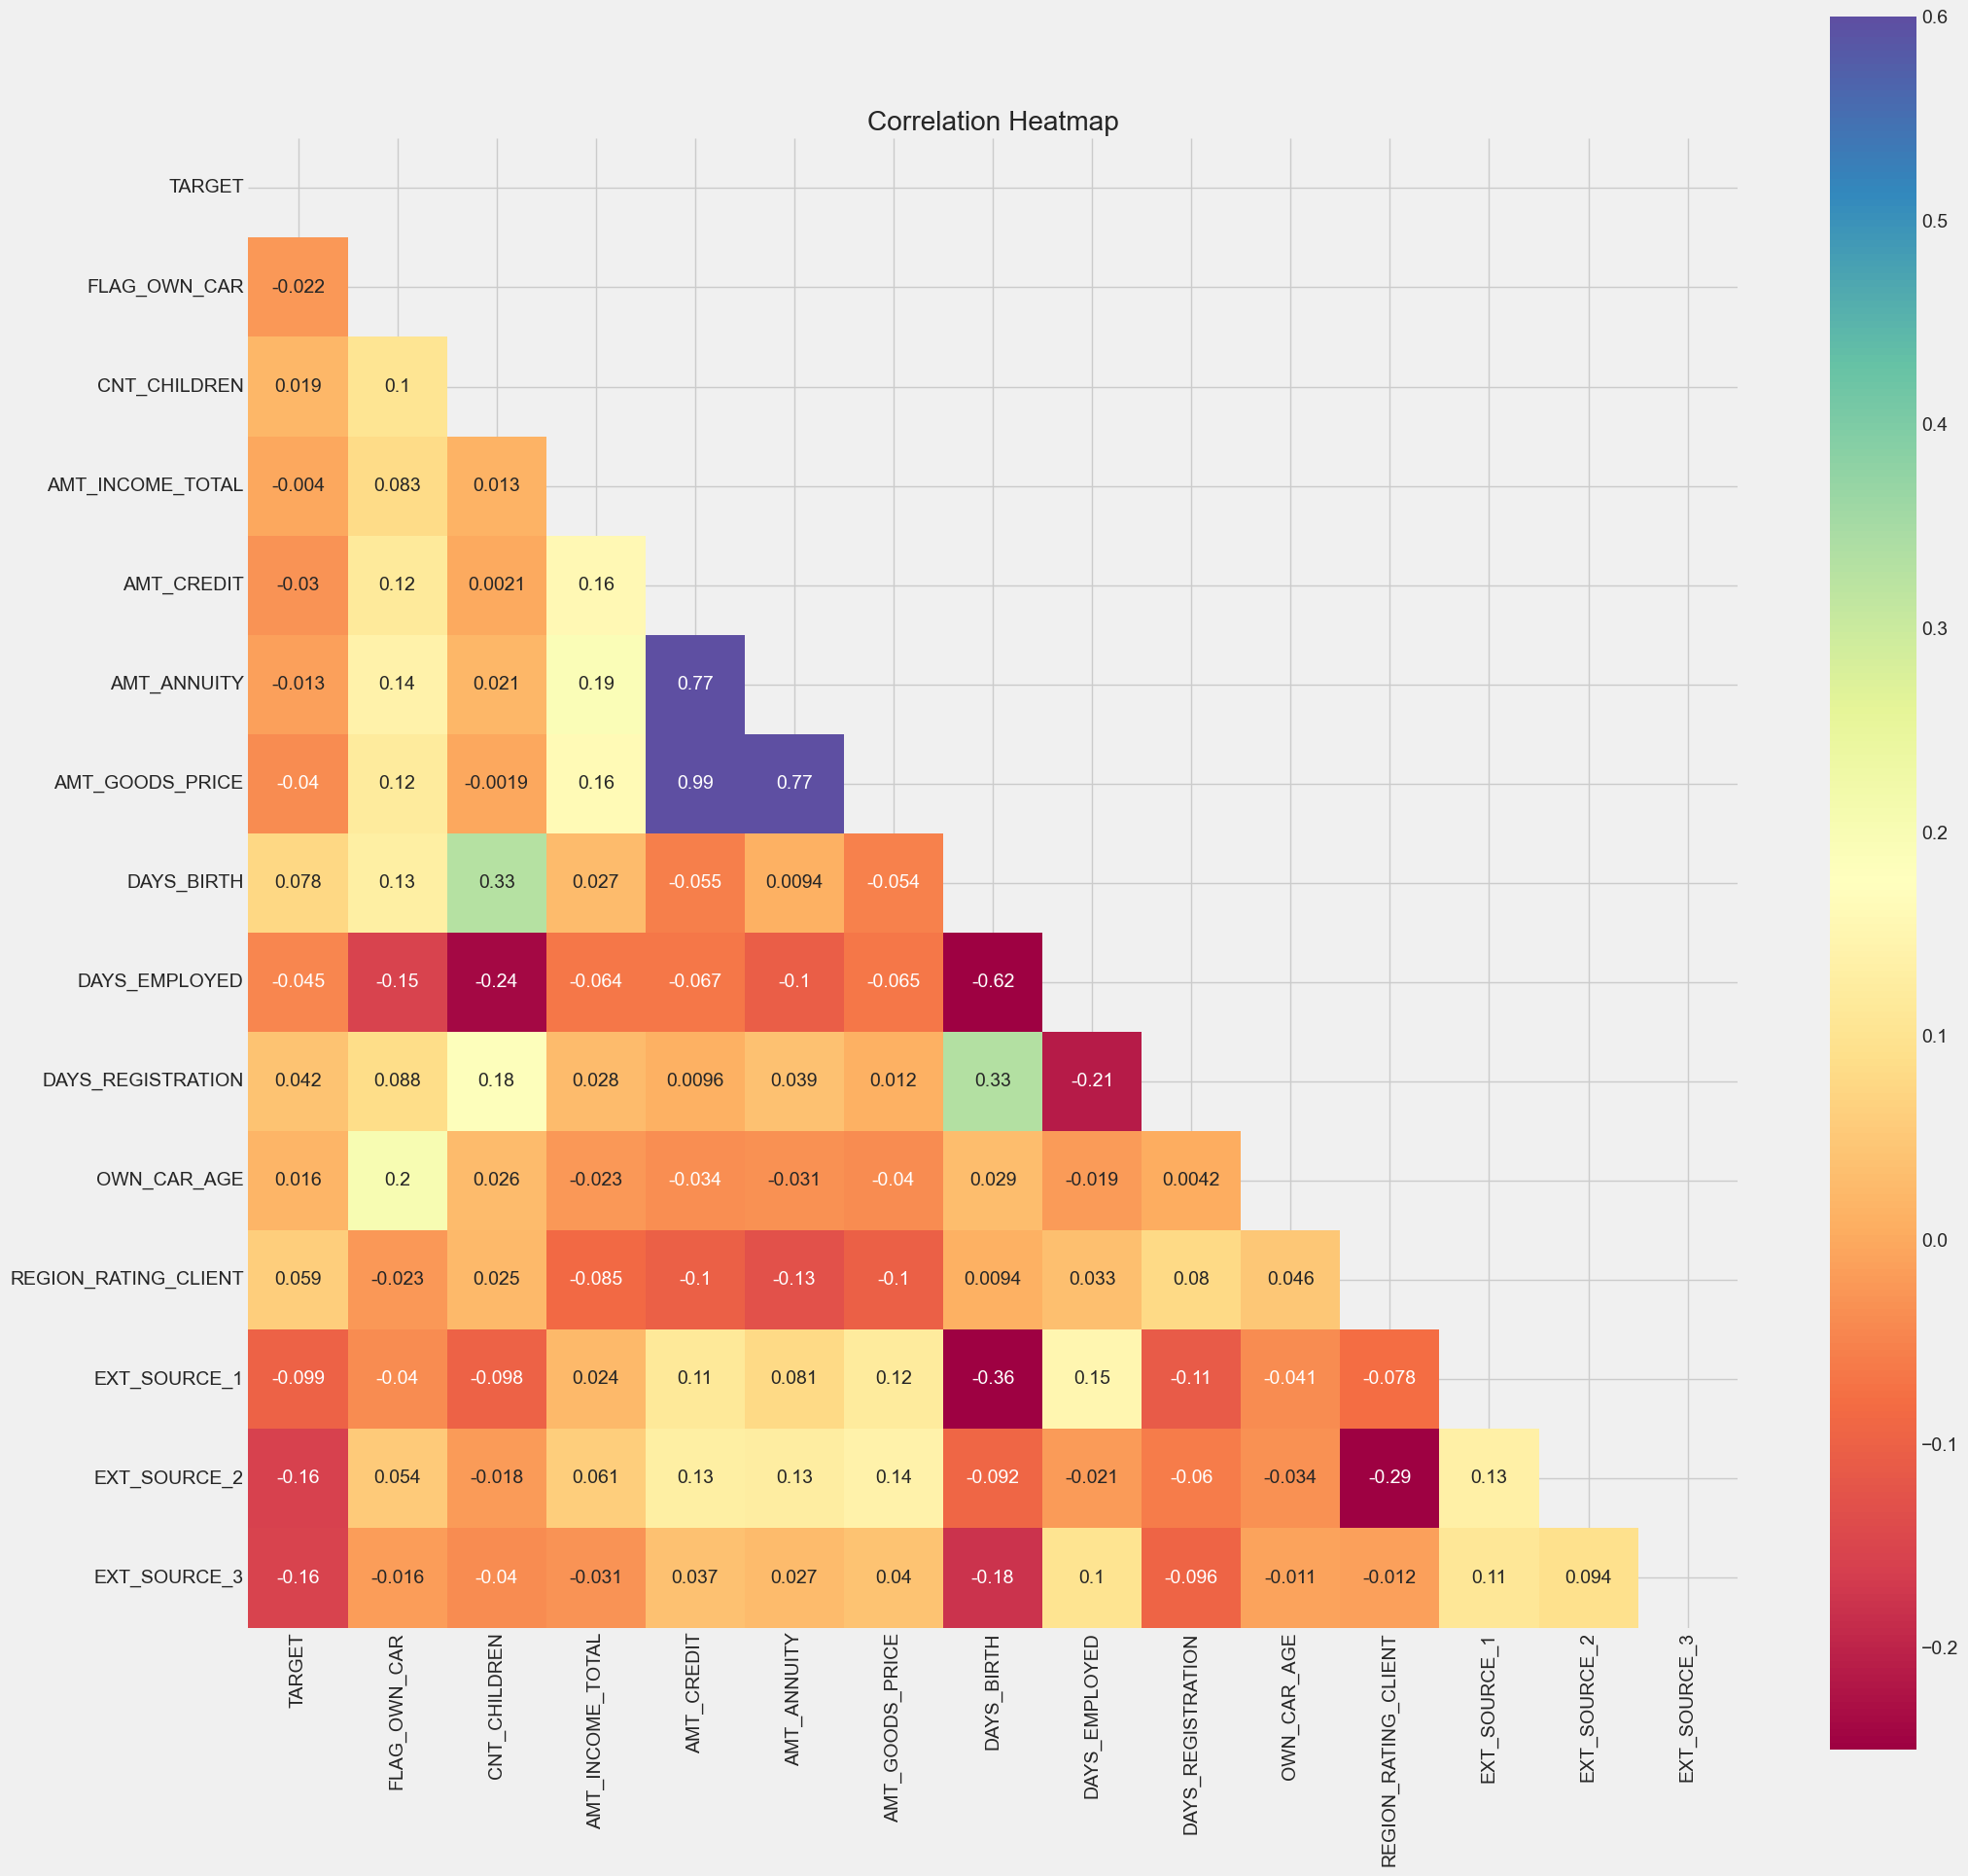

In [27]:
plt.figure(figsize = (22, 22))
mask = np.triu(np.ones_like(ext_data.corr()))

# Heatmap of correlations
sns.heatmap(ext_data.corr(),mask = mask, cmap = plt.cm.Spectral,square=True, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

In [28]:
# A PARTIR D'ICI -> A DEPLACER APRES EXPLORATION DF TEST

### application_test.csv

In [29]:
########## df test -> sans target ##########
df_test = pd.read_csv('data/application_test.csv')
df_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [30]:
df_test.shape

(48744, 121)

In [31]:
df_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [32]:
# The test set is considerably smaller and lacks a TARGET column. (normal)
# Test dataset -> sera ignoré ici

In [33]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [34]:
fonctions.remove_duplicates(df_test)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********



Nombre de données manquantes dans le jeu de données = 1404419

Pourcentage de valeurs manquantes : 23.81


Valeurs manquantes par colonne : 



Nombres de valeurs manquantes  \
COMMONAREA_MODE                                       33495   
COMMONAREA_MEDI                                       33495   
COMMONAREA_AVG                                        33495   
NONLIVINGAPARTMENTS_MEDI                              33347   
NONLIVINGAPARTMENTS_AVG                               33347   
NONLIVINGAPARTMENTS_MODE                              33347   
FONDKAPREMONT_MODE                                    32797   
LIVINGAPARTMENTS_MODE                                 32780   
LIVINGAPARTMENTS_MEDI                                 32780   
LIVINGAPARTMENTS_AVG                                  32780   
FLOORSMIN_MEDI                                        32466   
FLOORSMIN_MODE                                        32466   
FLOORSMIN_AVG                                         32466   
OWN_CAR_AGE                                           32312   
YEARS_BUILD_AVG                                       31818   
YEARS_BUILD_MEDI                                      31818   
YEARS_BUILD_MODE                                      31818   
LANDAREA_MODE                                         28254   
LANDAREA_AVG                                          28254   
LANDAREA_MEDI                                         28254   
BASEMENTAREA_MEDI                                     27641   
BASEMENTAREA_AVG                                      27641   
BASEMENTAREA_MODE                                     27641   
NONLIVINGAREA_MEDI                                    26084   
NONLIVINGAREA_MODE                                    26084   
NONLIVINGAREA_AVG                                     26084   
ELEVATORS_MEDI                                        25189   
ELEVATORS_MODE                                        25189   
ELEVATORS_AVG                                         25189   
WALLSMATERIAL_MODE                                    23893   
APARTMENTS_MODE                                       23887   
APARTMENTS_MEDI                                       23887   
APARTMENTS_AVG                                        23887   
HOUSETYPE_MODE                                        23619   
ENTRANCES_MODE                                        23579   
ENTRANCES_MEDI                                        23579   
ENTRANCES_AVG                                         23579   
LIVINGAREA_AVG                                        23552   
LIVINGAREA_MEDI                                       23552   
LIVINGAREA_MODE                                       23552   
FLOORSMAX_MEDI                                        23321   
FLOORSMAX_MODE                                        23321   
FLOORSMAX_AVG                                         23321   
YEARS_BEGINEXPLUATATION_MEDI                          22856   
YEARS_BEGINEXPLUATATION_MODE                          22856   
YEARS_BEGINEXPLUATATION_AVG                           22856   
TOTALAREA_MODE                                        22624   
EMERGENCYSTATE_MODE                                   22209   
EXT_SOURCE_1                                          20532   
OCCUPATION_TYPE                                       15605   
EXT_SOURCE_3                                           8668   
AMT_REQ_CREDIT_BUREAU_MON                              6049   
AMT_REQ_CREDIT_BUREAU_HOUR                             6049   
AMT_REQ_CREDIT_BUREAU_QRT                              6049   
AMT_REQ_CREDIT_BUREAU_WEEK                             6049   
AMT_REQ_CREDIT_BUREAU_DAY                              6049   
AMT_REQ_CREDIT_BUREAU_YEAR                             6049   
NAME_TYPE_SUITE                                         911   
DEF_60_CNT_SOCIAL_CIRCLE                                 29   
OBS_60_CNT_SOCIAL_CIRCLE                                 29   
DEF_30_CNT_SOCIAL_CIRCLE                                 29   
OBS_30_CNT_SOCIAL_CIRCLE                                 29   
AMT_ANNUITY                                              24  


Heatmap des valeurs manquantes : 



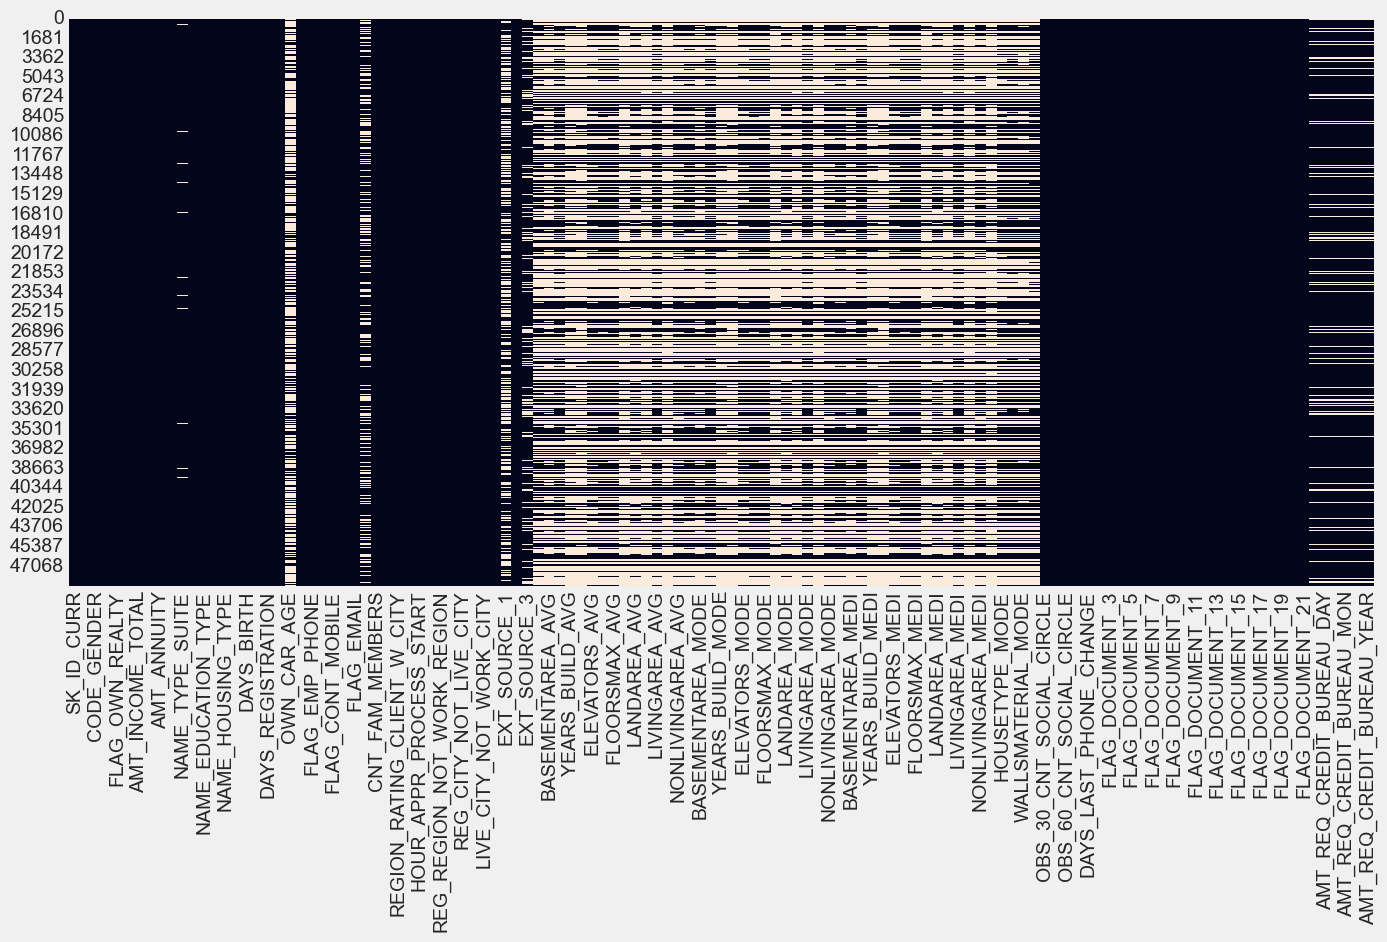

In [35]:
fonctions.nan_detection(df_test)

In [36]:
########## Encoding des jeux de données train et test ##########

# Encoding des variables catégorielles

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df_train:
    if df_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(df_train[col])
            # Transform both training and testing data
            df_train[col] = le.transform(df_train[col])
            df_test[col] = le.transform(df_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [37]:
# one-hot encoding of categorical variables
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

Training Features shape:  (307511, 251)
Testing Features shape:  (48744, 239)


In [38]:
########## Reprise de l'EDA train & test et début du feature engineering ##########

In [39]:
df_test['DAYS_EMPLOYED_ANOM'] = df_test["DAYS_EMPLOYED"] == 365243
df_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (df_test["DAYS_EMPLOYED_ANOM"].sum(), len(df_test)))

There are 9274 anomalies in the test data out of 48744 entries


In [ ]:
# Find correlations with the target and sort
correlations = df_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [ ]:
# Find the correlation of the positive days since birth and target
df_train['DAYS_BIRTH'] = abs(df_train['DAYS_BIRTH'])
df_train['DAYS_BIRTH'].corr(df_train['TARGET'])

-0.07823930830982709

In [ ]:
# As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

Text(0, 0.5, 'Count')

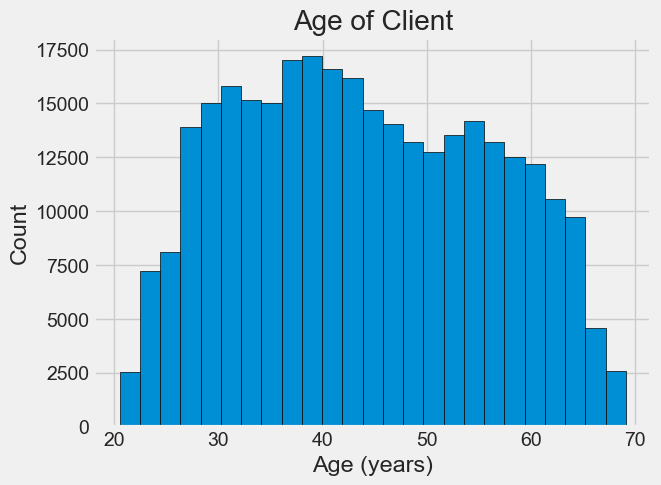

In [ ]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(df_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

Text(0.5, 1.0, 'Distribution of Ages')

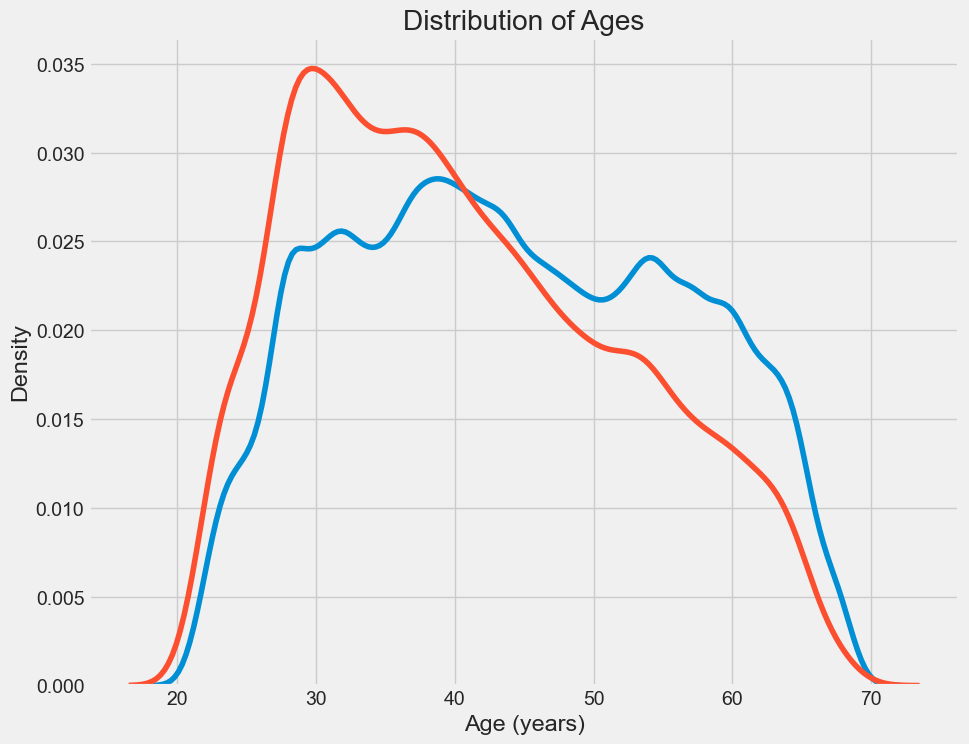

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')

In [ ]:
# Age information into a separate dataframe
age_data = df_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [ ]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036   8532.795625    23.377522
(25.0, 30.0]  0.111436  10155.219250    27.822518
(30.0, 35.0]  0.102814  11854.848377    32.479037
(35.0, 40.0]  0.089414  13707.908253    37.555913
(40.0, 45.0]  0.078491  15497.661233    42.459346
(45.0, 50.0]  0.074171  17323.900441    47.462741
(50.0, 55.0]  0.066968  19196.494791    52.593136
(55.0, 60.0]  0.055314  20984.262742    57.491131
(60.0, 65.0]  0.052737  22780.547460    62.412459
(65.0, 70.0]  0.037270  24292.614340    66.555108

Text(0.5, 1.0, 'Failure to Repay by Age Group')

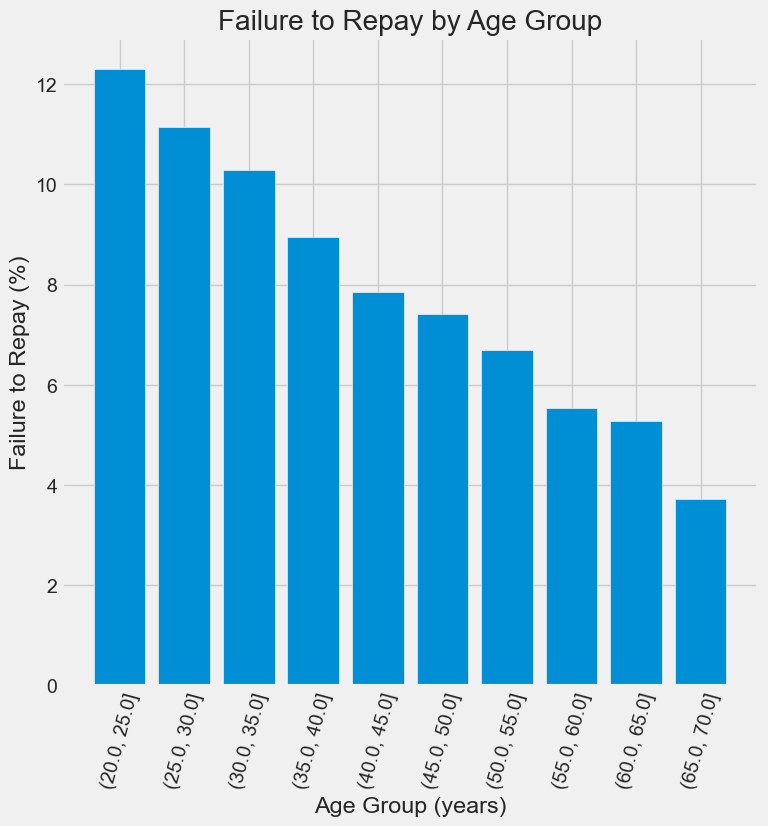

In [ ]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

In [ ]:
# Exterior Sources

# Extract the EXT_SOURCE variables and show correlations
ext_data = df_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919   -0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846    0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.600610      0.091996      0.205478    1.000000

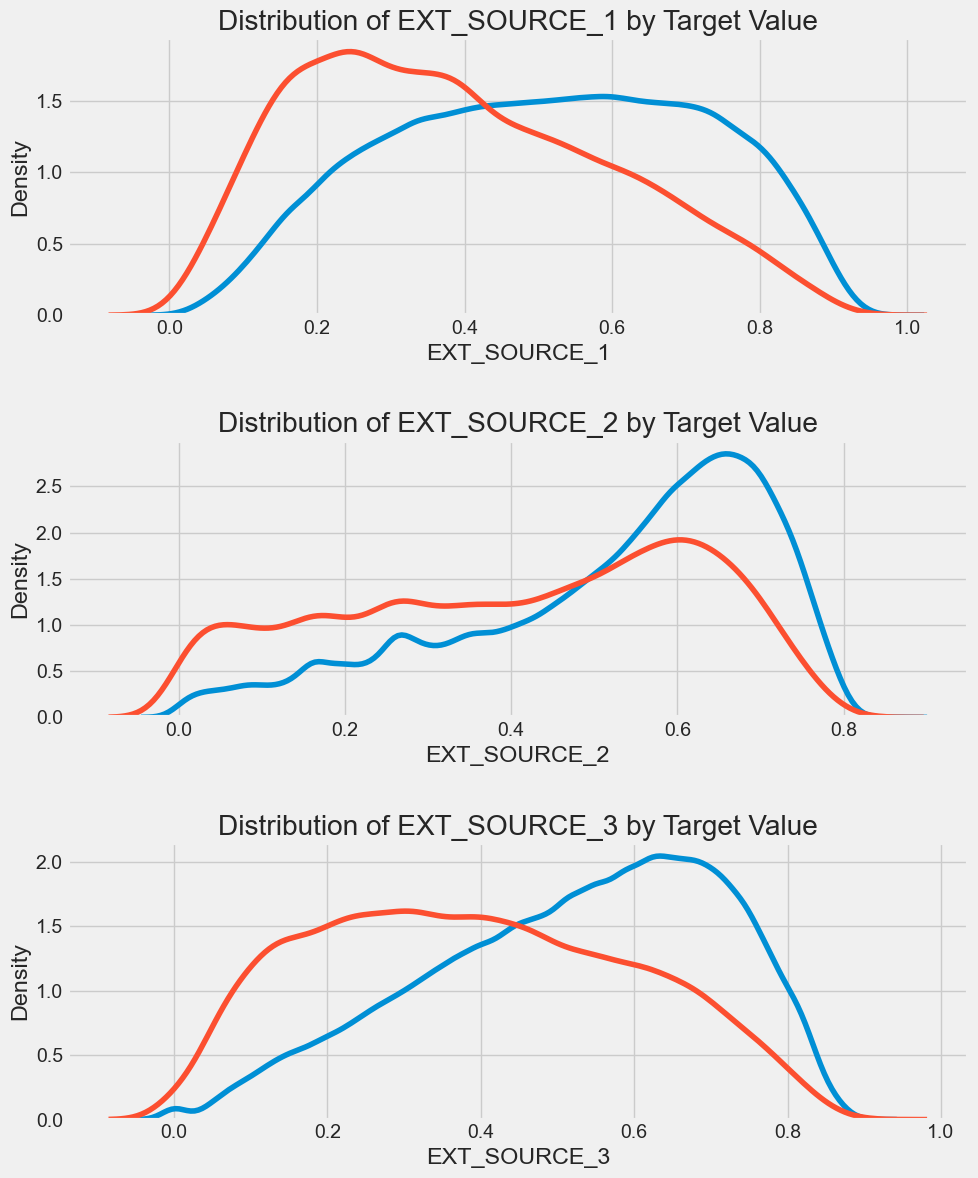

In [ ]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source)
    plt.ylabel('Density')
    
plt.tight_layout(h_pad = 2.5)

Text(0.5, 1.05, 'Ext Source and Age Features Pairs Plot')

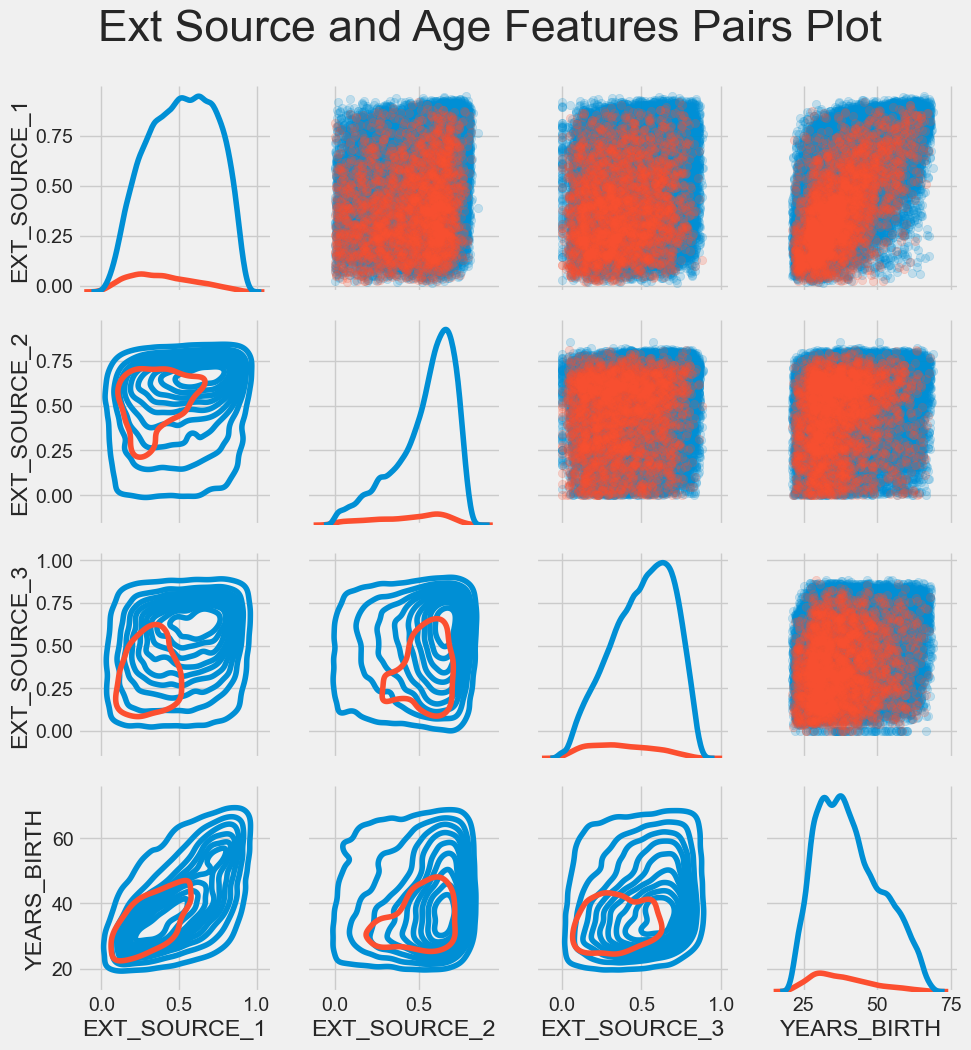

In [ ]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate(
        "r = {:.2f}".format(r),
        xy = (.2, .8),
        xycoords = ax.transAxes,
        size = 20
        )

# Create the pairgrid object
grid = sns.PairGrid(
    data = plot_data,
    diag_sharey = False,
    hue = 'TARGET',
    vars = [x for x in list(plot_data.columns) if x != 'TARGET']
    )

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)

In [ ]:
# Feature engineering

# Make a new dataframe for polynomial features
poly_features = df_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = df_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [ ]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [ ]:
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

In [ ]:
# Create a dataframe of the features
poly_features = pd.DataFrame(
    poly_features,
    columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])
    )

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


Text(0.5, 1.0, 'Correlation Heatmap')

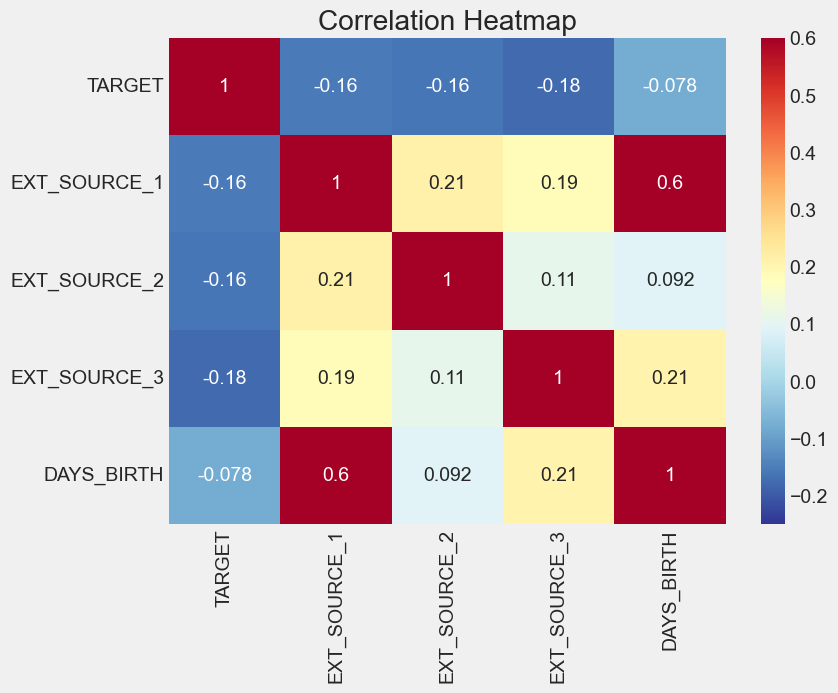

In [ ]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

### bureau.csv

In [ ]:
df_bureau = pd.read_csv('data/bureau.csv')
df_bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [ ]:
df_bureau.shape

(1716428, 17)

In [ ]:
df_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [ ]:
fonctions.remove_duplicates(df_bureau)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 3939947

Pourcentage de valeurs manquantes : 13.5


Valeurs manquantes par colonne : 



Nombres de valeurs manquantes  % de valeurs manquantes
AMT_ANNUITY                                   1226791                    71.47
AMT_CREDIT_MAX_OVERDUE                        1124488                    65.51
DAYS_ENDDATE_FACT                              633653                    36.92
AMT_CREDIT_SUM_LIMIT                           591780                    34.48
AMT_CREDIT_SUM_DEBT                            257669                    15.01
DAYS_CREDIT_ENDDATE                            105553                     6.15
AMT_CREDIT_SUM                                     13                     0.00


Heatmap des valeurs manquantes : 



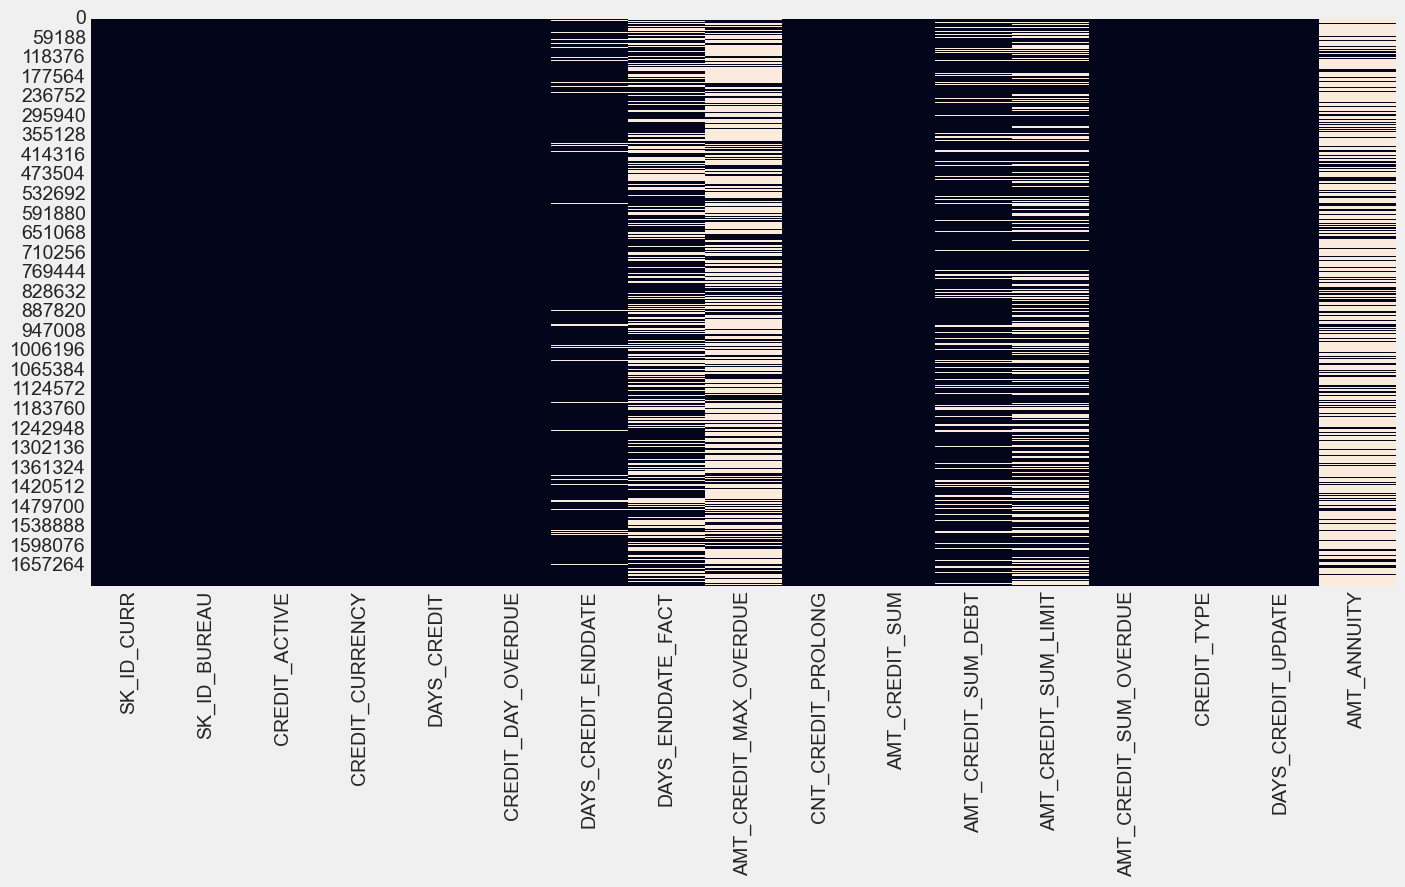

In [ ]:
fonctions.nan_detection(df_bureau)

In [ ]:
# Groupby the client id (SK_ID_CURR), count the number of previous loans, and rename the column
previous_loan_counts = df_bureau.groupby('SK_ID_CURR', as_index = False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()

SK_ID_CURR  previous_loan_counts
0      100001                     7
1      100002                     8
2      100003                     4
3      100004                     2
4      100005                     3

In [ ]:
# merger avec df train
# train = train.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
#train['previous_loan_counts'] = train['previous_loan_counts'].fillna(0)

In [ ]:
df_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [ ]:
# Group by the client id, calculate aggregation statistics
bureau_agg = df_bureau.drop(columns = ['SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_agg.head()

index SK_ID_CURR DAYS_CREDIT                                \
                         count         mean  max   min   sum   
0     0     100001           7  -735.000000  -49 -1572 -5145   
1     1     100002           8  -874.000000 -103 -1437 -6992   
2     2     100003           4 -1400.750000 -606 -2586 -5603   
3     3     100004           2  -867.000000 -408 -1326 -1734   
4     4     100005           3  -190.666667  -62  -373  -572   

  CREDIT_DAY_OVERDUE                  DAYS_CREDIT_ENDDATE                      \
               count mean max min sum               count        mean     max   
0                  7  0.0   0   0   0                   7   82.428571  1778.0   
1                  8  0.0   0   0   0                   6 -349.000000   780.0   
2                  4  0.0   0   0   0                   4 -544.500000  1216.0   
3                  2  0.0   0   0   0                   2 -488.500000  -382.0   
4                  3  0.0   0   0   0                   3  439.333333  1324.0   

                  DAYS_ENDDATE_FACT                                      \
      min     sum             count         mean    max     min     sum   
0 -1329.0   577.0                 4  -825.500000 -544.0 -1328.0 -3302.0   
1 -1072.0 -2094.0                 6  -697.500000  -36.0 -1185.0 -4185.0   
2 -2434.0 -2178.0                 3 -1097.333333 -540.0 -2131.0 -3292.0   
3  -595.0  -977.0                 2  -532.500000 -382.0  -683.0 -1065.0   
4  -128.0  1318.0                 1  -123.000000 -123.0  -123.0  -123.0   

  AMT_CREDIT_MAX_OVERDUE                                     \
                   count      mean       max  min       sum   
0                      0       NaN       NaN  NaN     0.000   
1                      5  1681.029  5043.645  0.0  8405.145   
2                      4     0.000     0.000  0.0     0.000   
3                      1     0.000     0.000  0.0     0.000   
4                      1     0.000     0.000  0.0     0.000   

  CNT_CREDIT_PROLONG                  AMT_CREDIT_SUM                           \
               count mean max min sum          count           mean       max   
0                  7  0.0   0   0   0              7  207623.571429  378000.0   
1                  8  0.0   0   0   0              8  108131.945625  450000.0   
2                  4  0.0   0   0   0              4  254350.125000  810000.0   
3                  2  0.0   0   0   0              2   94518.900000   94537.8   
4                  3  0.0   0   0   0              3  219042.000000  568800.0   

                        AMT_CREDIT_SUM_DEBT                                \
       min          sum               count           mean       max  min   
0  85500.0  1453365.000                   7   85240.928571  373239.0  0.0   
1      0.0   865055.565                   5   49156.200000  245781.0  0.0   
2  22248.0  1017400.500                   4       0.000000       0.0  0.0   
3  94500.0   189037.800                   2       0.000000       0.0  0.0   
4  29826.0   657126.000                   3  189469.500000  543087.0  0.0   

            AMT_CREDIT_SUM_LIMIT                                             \
        sum                count          mean         max  min         sum   
0  596686.5                    6       0.00000       0.000  0.0       0.000   
1  245781.0                    4    7997.14125   31988.565  0.0   31988.565   
2       0.0                    4  202500.00000  810000.000  0.0  810000.000   
3       0.0                    2       0.00000       0.000  0.0       0.000   
4  568408.5                    3       0.00000       0.000  0.0       0.000   

  AMT_CREDIT_SUM_OVERDUE                     DAYS_CREDIT_UPDATE              \
                   count mean  max  min  sum              count        mean   
0                      7  0.0  0.0  0.0  0.0                  7  -93.142857   
1                      8  0.0  0.0  0.0  0.0                  8 -499.875000   
2                      4  0.0  0.0  0.0

### bureau_balance.csv

In [ ]:
df_bureau_balance = pd.read_csv('data/bureau_balance.csv')
df_bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [ ]:
df_bureau_balance.shape

(27299925, 3)

In [ ]:
df_bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [ ]:
fonctions.remove_duplicates(df_bureau_balance)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


In [ ]:
fonctions.nan_detection(df_bureau_balance)

********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 0


### credit_card_balance.csv

In [ ]:
df_credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
df_credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [ ]:
df_credit_card_balance.shape

(3840312, 23)

In [ ]:
df_credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [ ]:
fonctions.remove_duplicates(df_credit_card_balance)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 5877356

Pourcentage de valeurs manquantes : 6.65


Valeurs manquantes par colonne : 



Nombres de valeurs manquantes  \
AMT_PAYMENT_CURRENT                                767988   
AMT_DRAWINGS_ATM_CURRENT                           749816   
AMT_DRAWINGS_OTHER_CURRENT                         749816   
AMT_DRAWINGS_POS_CURRENT                           749816   
CNT_DRAWINGS_ATM_CURRENT                           749816   
CNT_DRAWINGS_OTHER_CURRENT                         749816   
CNT_DRAWINGS_POS_CURRENT                           749816   
AMT_INST_MIN_REGULARITY                            305236   
CNT_INSTALMENT_MATURE_CUM                          305236   

                            % de valeurs manquantes  
AMT_PAYMENT_CURRENT                           20.00  
AMT_DRAWINGS_ATM_CURRENT                      19.52  
AMT_DRAWINGS_OTHER_CURRENT                    19.52  
AMT_DRAWINGS_POS_CURRENT                      19.52  
CNT_DRAWINGS_ATM_CURRENT                      19.52  
CNT_DRAWINGS_OTHER_CURRENT                    19.52  
CNT_DRAWINGS_POS_CURRENT                      19.52  
AMT_INST_MIN_REGULARITY                        7.95  
CNT_INSTALMENT_MATURE_CUM                      7.95


Heatmap des valeurs manquantes : 



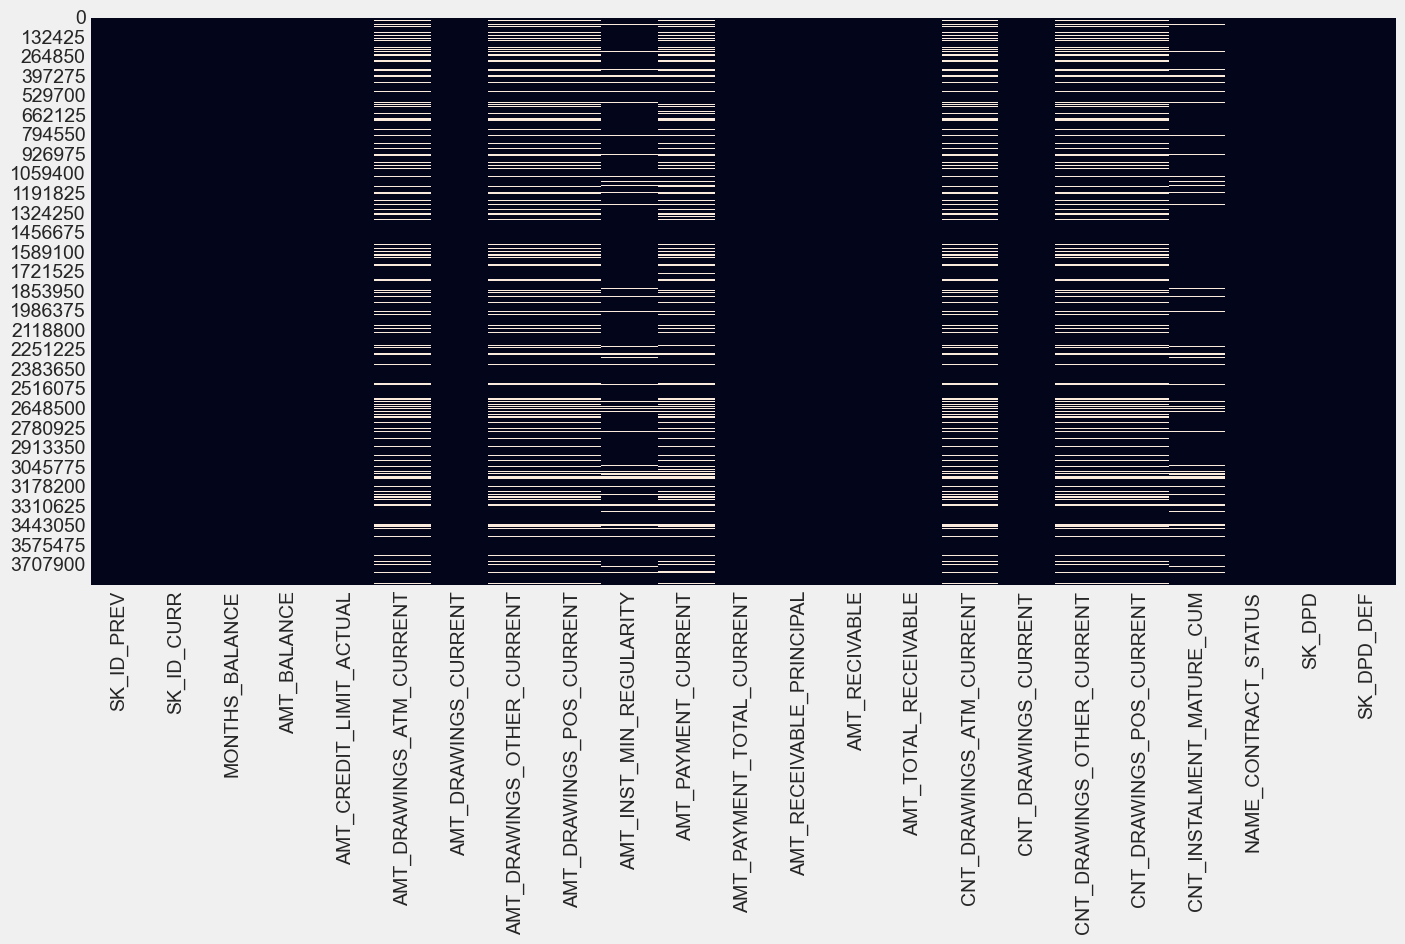

In [ ]:
fonctions.nan_detection(df_credit_card_balance)

### HomeCredit_columns_description.csv

In [ ]:
df_homecredit = pd.read_csv('data/HomeCredit_columns_description.csv', encoding = 'latin1')
df_homecredit.head()

Unnamed: 0                         Table                 Row  \
0           1  application_{train|test}.csv          SK_ID_CURR   
1           2  application_{train|test}.csv              TARGET   
2           5  application_{train|test}.csv  NAME_CONTRACT_TYPE   
3           6  application_{train|test}.csv         CODE_GENDER   
4           7  application_{train|test}.csv        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

In [ ]:
df_homecredit.shape

(219, 5)

In [ ]:
df_homecredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   219 non-null    int64 
 1   Table        219 non-null    object
 2   Row          219 non-null    object
 3   Description  219 non-null    object
 4   Special      86 non-null     object
dtypes: int64(1), object(4)
memory usage: 8.7+ KB


In [ ]:
fonctions.remove_duplicates(df_homecredit)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 133

Pourcentage de valeurs manquantes : 12.15


Valeurs manquantes par colonne : 



Nombres de valeurs manquantes  % de valeurs manquantes
Special                            133                    60.73


Heatmap des valeurs manquantes : 



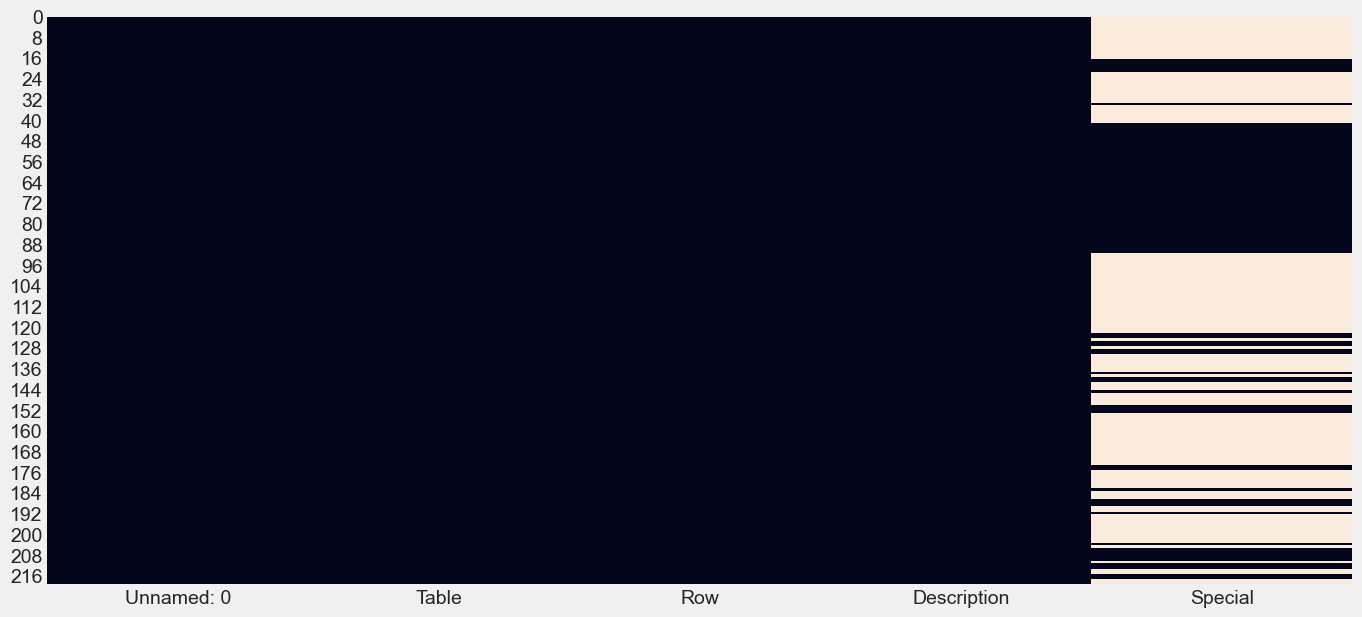

In [ ]:
fonctions.nan_detection(df_homecredit)

### installments_payments.csv

In [ ]:
df_installments = pd.read_csv('data/installments_payments.csv')
df_installments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [ ]:
df_installments.shape

(13605401, 8)

In [ ]:
df_installments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [ ]:
fonctions.remove_duplicates(df_installments)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 5810

Pourcentage de valeurs manquantes : 0.01


Valeurs manquantes par colonne : 



Nombres de valeurs manquantes  % de valeurs manquantes
DAYS_ENTRY_PAYMENT                           2905                     0.02
AMT_PAYMENT                                  2905                     0.02


Heatmap des valeurs manquantes : 



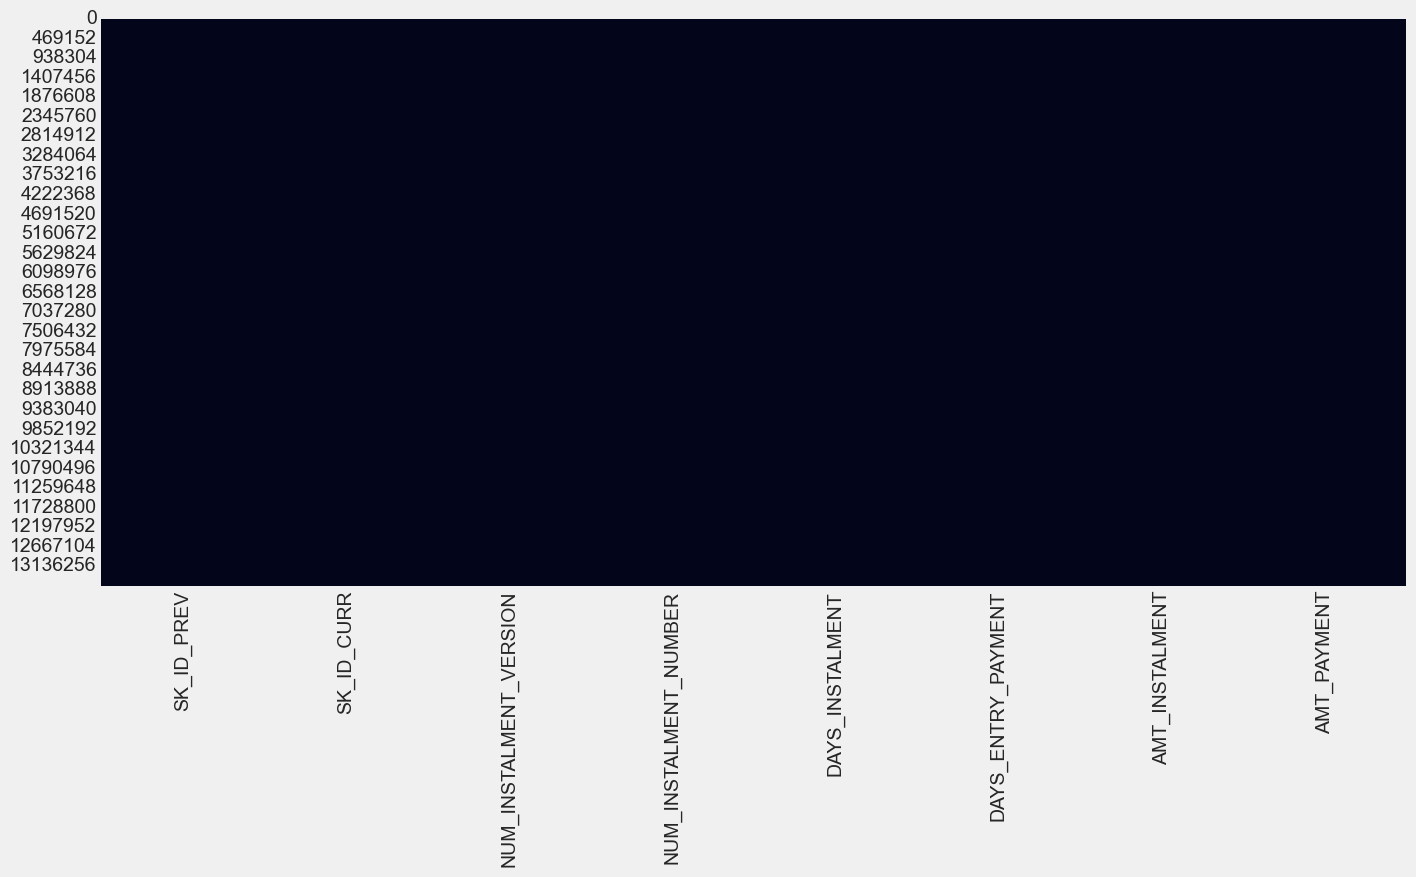

In [ ]:
fonctions.nan_detection(df_installments)

### POS_CASH_balance.csv

In [ ]:
df_pos_cash = pd.read_csv('data/POS_CASH_balance.csv')
df_pos_cash.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [ ]:
df_pos_cash.shape

(10001358, 8)

In [ ]:
df_pos_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [ ]:
fonctions.remove_duplicates(df_pos_cash)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 52158

Pourcentage de valeurs manquantes : 0.07


Valeurs manquantes par colonne : 



Nombres de valeurs manquantes  % de valeurs manquantes
CNT_INSTALMENT                                 26071                     0.26
CNT_INSTALMENT_FUTURE                          26087                     0.26


Heatmap des valeurs manquantes : 



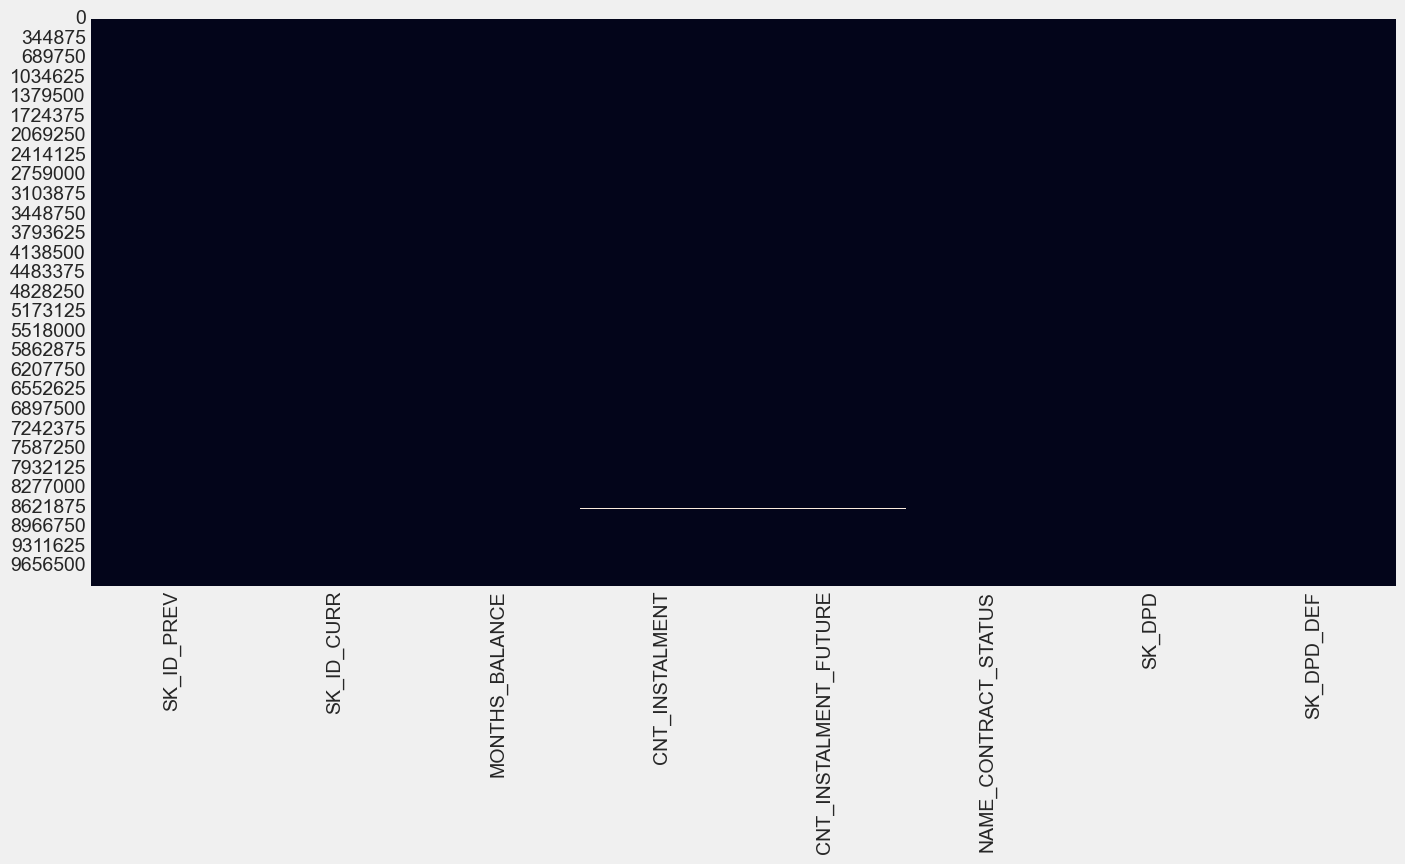

In [ ]:
fonctions.nan_detection(df_pos_cash)

### previous_application.csv

In [ ]:
df_previous_application = pd.read_csv('data/previous_application.csv')
df_previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [ ]:
df_previous_application.shape

(1670214, 37)

In [ ]:
df_previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
fonctions.remove_duplicates(df_previous_application)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 11109336

Pourcentage de valeurs manquantes : 17.98


Valeurs manquantes par colonne : 



Nombres de valeurs manquantes  \
RATE_INTEREST_PRIMARY                            1664263   
RATE_INTEREST_PRIVILEGED                         1664263   
AMT_DOWN_PAYMENT                                  895844   
RATE_DOWN_PAYMENT                                 895844   
NAME_TYPE_SUITE                                   820405   
DAYS_FIRST_DRAWING                                673065   
DAYS_FIRST_DUE                                    673065   
DAYS_LAST_DUE_1ST_VERSION                         673065   
DAYS_LAST_DUE                                     673065   
DAYS_TERMINATION                                  673065   
NFLAG_INSURED_ON_APPROVAL                         673065   
AMT_GOODS_PRICE                                   385515   
AMT_ANNUITY                                       372235   
CNT_PAYMENT                                       372230   
PRODUCT_COMBINATION                                  346   
AMT_CREDIT                                             1   

                           % de valeurs manquantes  
RATE_INTEREST_PRIMARY                        99.64  
RATE_INTEREST_PRIVILEGED                     99.64  
AMT_DOWN_PAYMENT                             53.64  
RATE_DOWN_PAYMENT                            53.64  
NAME_TYPE_SUITE                              49.12  
DAYS_FIRST_DRAWING                           40.30  
DAYS_FIRST_DUE                               40.30  
DAYS_LAST_DUE_1ST_VERSION                    40.30  
DAYS_LAST_DUE                                40.30  
DAYS_TERMINATION                             40.30  
NFLAG_INSURED_ON_APPROVAL                    40.30  
AMT_GOODS_PRICE                              23.08  
AMT_ANNUITY                                  22.29  
CNT_PAYMENT                                  22.29  
PRODUCT_COMBINATION                           0.02  
AMT_CREDIT                                    0.00


Heatmap des valeurs manquantes : 



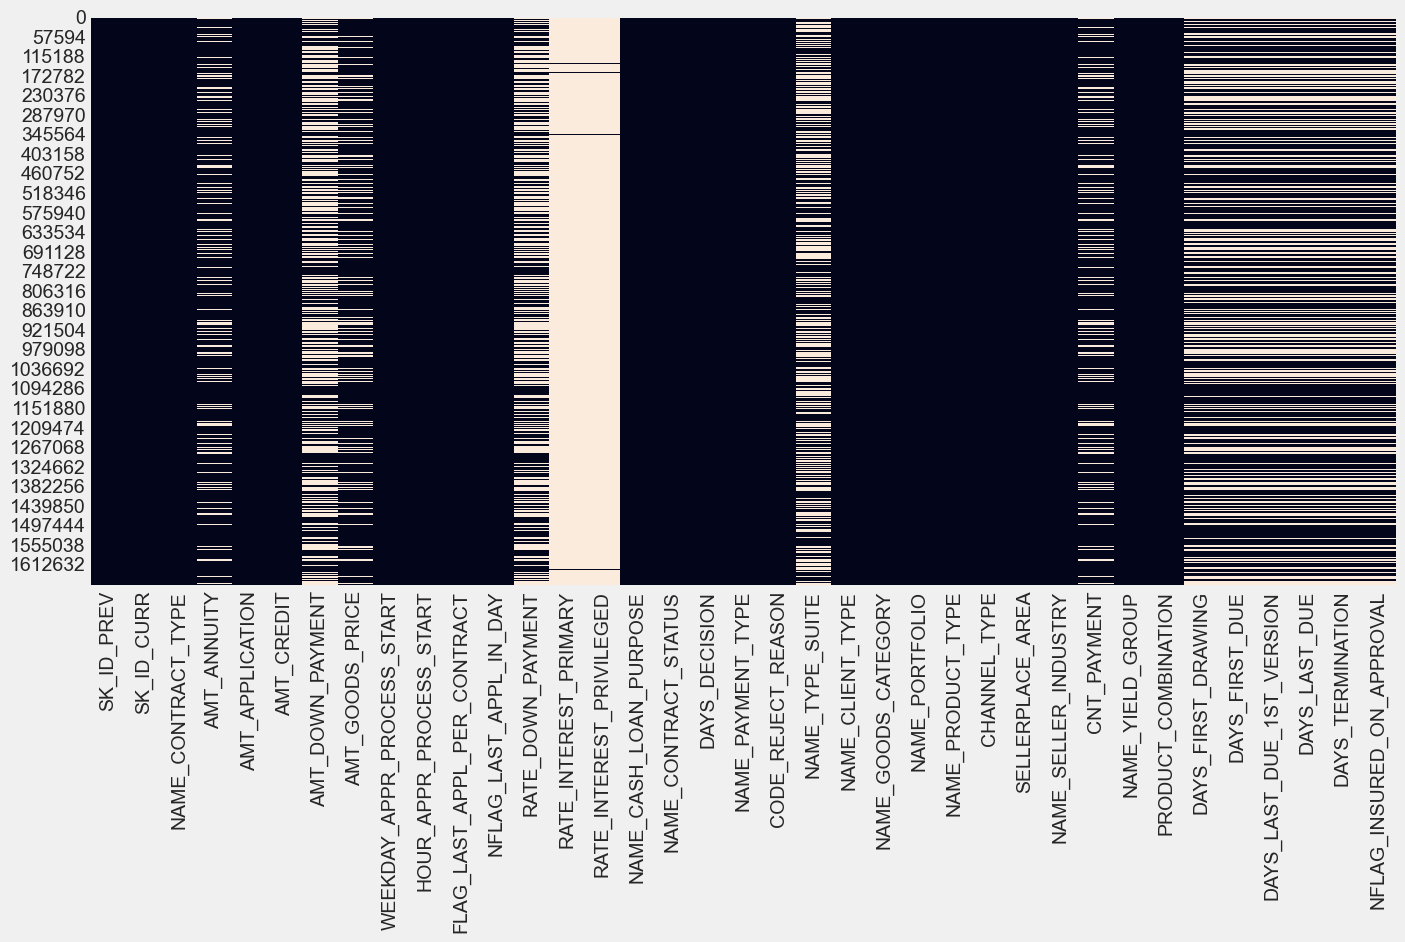

In [ ]:
fonctions.nan_detection(df_previous_application)

### sample_submission.csv

In [ ]:
df_sample_submission = pd.read_csv('data/sample_submission.csv')
df_sample_submission.head()

SK_ID_CURR  TARGET
0      100001     0.5
1      100005     0.5
2      100013     0.5
3      100028     0.5
4      100038     0.5

In [ ]:
df_sample_submission.shape

(48744, 2)

In [ ]:
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  48744 non-null  int64  
 1   TARGET      48744 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 761.8 KB


In [ ]:
fonctions.remove_duplicates(df_sample_submission)

********** Détection des doublons **********

Nombre de duplicats dans le jeu de données = 0


In [ ]:
fonctions.nan_detection(df_sample_submission)

********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 0
